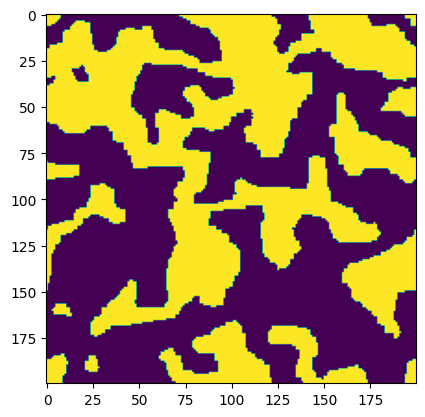

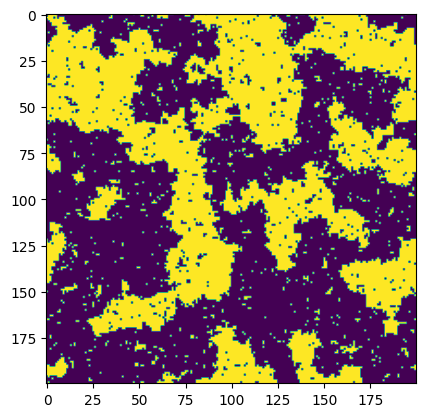

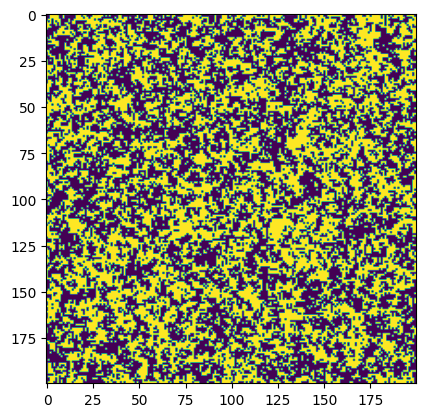

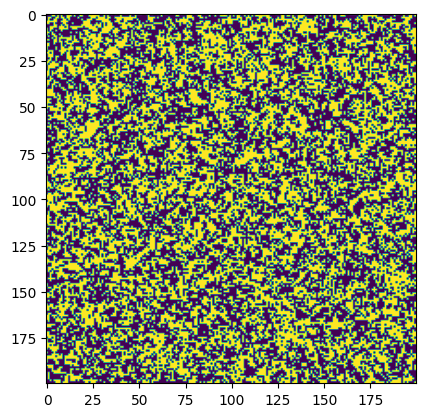

In [2]:
from types import LambdaType
from numpy.core.multiarray import array
import numpy as np
import math
import matplotlib.pyplot as plt

def E(arr,J):
    L=len(arr)
    sum=0
    for i in range(L):
        for j in range(L):
            sum+=-J*arr[i][j]*(arr[(i+1)%L][j]+arr[i-1][j]+arr[i][(j+1)%L]+arr[i][j-1])
    return sum/2

def dE(x,a,b,c,d):
    E = 2*x*(a+b+c+d)
    return (E+8)/4

def metro_steps(arr,T,N):
    b_factor=np.array([(np.exp(-(4*i)/T)) for i in range(-2,3)])
    for n in range(N):
        for x in range(len(arr)):
            for y in range(len(arr)):
                #random index
                i = np.random.randint(0, L)
                j = np.random.randint(0, L)
                #random number
                r = np.random.rand()
                target=arr[i][j]
                a,b,c,d=arr[(i-1)%L][j],arr[(i+1)%L][j],arr[i][(j-1)%L],arr[i][(j+1)%L]
                delta_E = dE(target,a,b,c,d)
                #flip spin if delta_E < 0 or r < b_factor
                if delta_E < 0 or r < b_factor[int(delta_E)]:
                    arr[i][j]*=-1
    return arr


N=50
L=200
J=1
arr = np.random.choice([-1,1], size=(L,L))
arr = metro_steps(arr,0.5,N)
plt.imshow(arr,cmap='viridis')
plt.title(f"")
plt.show()
arr = metro_steps(arr,2,N)
plt.imshow(arr,cmap='viridis')
plt.show()
arr = metro_steps(arr,3.5,N)
plt.imshow(arr,cmap='viridis')
plt.show()
arr = metro_steps(arr,5,N)
plt.imshow(arr,cmap='viridis')
plt.show()

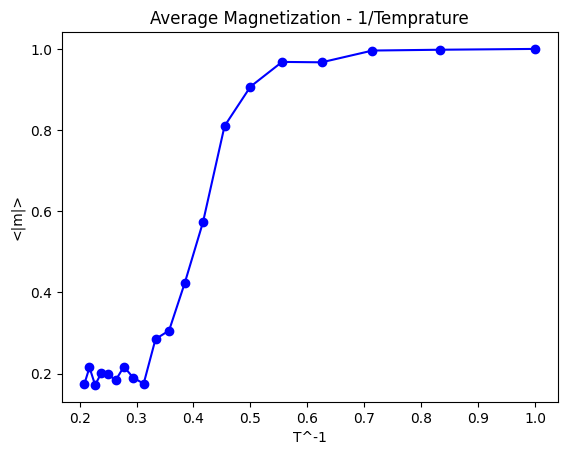

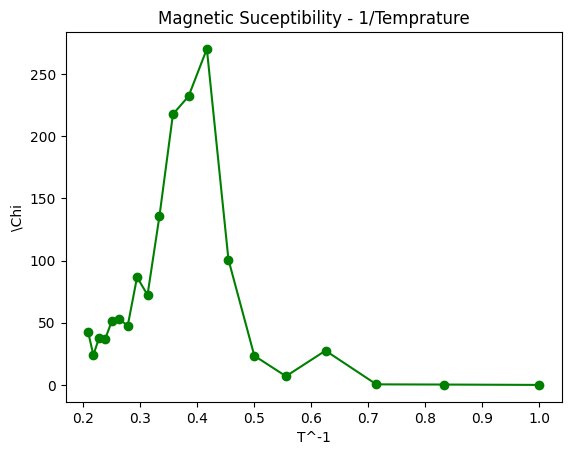

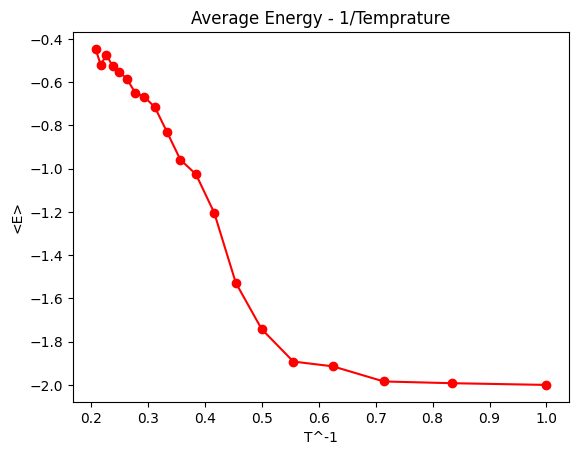

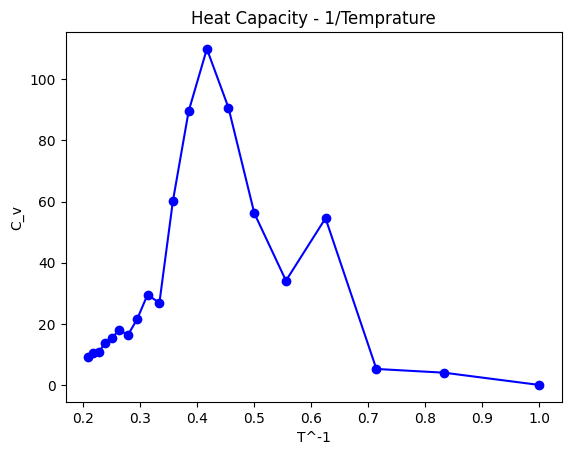

In [3]:
from types import LambdaType
from numpy.core.multiarray import array
import numpy as np
import math
import matplotlib.pyplot as plt

def E(arr,J):
    L=len(arr)
    sum=0
    for i in range(L):
        for j in range(L):
            sum+=-J*arr[i][j]*(arr[(i+1)%L][j]+arr[i-1][j]+arr[i][(j+1)%L]+arr[i][j-1])
    return sum/2

def dE(x,a,b,c,d):
    E = 2*x*(a+b+c+d)
    return (E+8)/4

def metro_steps(arr,T,N):
    b_factor=np.array([(np.exp(-(4*i)/T)) for i in range(-2,3)])
    for n in range(N):
        for x in range(len(arr)):
            for y in range(len(arr)):
                #random index
                i = np.random.randint(0, L)
                j = np.random.randint(0, L)
                #random number
                r = np.random.rand()
                target=arr[i][j]
                a,b,c,d=arr[(i-1)%L][j],arr[(i+1)%L][j],arr[i][(j-1)%L],arr[i][(j+1)%L]
                delta_E = dE(target,a,b,c,d)
                #flip spin if delta_E < 0 or r < b_factor
                if delta_E < 0 or r < b_factor[int(delta_E)]:
                    arr[i][j]*=-1
    return arr


N=100
L=10
J=1
M_T=np.zeros(20)
chi_T=np.zeros(20)
E_T=np.zeros(20)
Cv_T=np.zeros(20)
T_arr=np.arange(1,5,0.2)
i=0
for T in T_arr:
    mag=np.zeros(20)
    e=np.zeros(20)
    arr = np.random.choice([-1,1], size=(L,L))
    for repeat in range(20):     
        arr = metro_steps(arr,T,N)
        mag[repeat]=np.abs(np.sum(arr))
        e[repeat]=E(arr,J)
    M_T[i]=np.mean(mag)
    chi_T[i]=np.var(mag)/T
    E_T[i]=np.mean(e)
    Cv_T[i]=np.var(e)/(T**2)
    i+=1

T_inverse=np.array([1/T_arr[i] for i in range(len(T_arr))])
plt.plot(T_inverse,M_T/(L*L), 'o-',color='b')
plt.xlabel('T^-1')
plt.ylabel('<|m|>')
plt.title('Average Magnetization - 1/Temprature', loc='center')
plt.show()
plt.plot(T_inverse,chi_T, 'o-',color='g')
plt.xlabel('T^-1')
plt.ylabel('\Chi')
plt.title('Magnetic Suceptibility - 1/Temprature', loc='center')
plt.show()
plt.plot(T_inverse,E_T/(L*L), 'o-',color='r')
plt.xlabel('T^-1')
plt.ylabel('<E>')
plt.title('Average Energy - 1/Temprature', loc='center')
plt.xlabel('T^-1')
plt.show()
plt.plot(T_inverse,Cv_T, 'o-',color='b')
plt.xlabel('T^-1')
plt.ylabel('C_v')
plt.title('Heat Capacity - 1/Temprature', loc='center')
plt.show()




